In [65]:
import pandas as pd
import os
import glob

In [66]:
all_list = glob.glob("Learning_set/Bearing1_1/*.csv")

In [70]:
all_temp_list = glob.glob("*.csv")

In [71]:
all_temp_list

['1-1_acc_df.csv',
 '1-1_temp_df.csv',
 '1-2_acc_df.csv',
 '1_3_acc_df(test).csv',
 '1_4_acc_df(test).csv',
 '1_4_temp_df(test).csv',
 '1_5_acc_df(test).csv',
 '1_5_temp_df(test).csv',
 '1_6_acc_df(test).csv',
 '1_6_temp_df(test).csv',
 '1_7_acc_df(test).csv',
 '1_7_temp_df(test).csv',
 '2-1_acc_df.csv',
 '2-2_acc_df.csv',
 '2_3_acc_df(test).csv',
 '2_4_acc_df(test).csv',
 '2_4_temp_df(test).csv',
 '2_5_acc_df(test).csv',
 '2_5_temp_df(test).csv',
 '2_6_acc_df(test).csv',
 '2_6_temp_df(test).csv',
 '2_7_acc_df(test).csv',
 '2_7_temp_df(test).csv',
 '3_1_acc_df.csv',
 '3_2_acc_df.csv',
 '3_3_acc_df(test).csv',
 '3_3_temp_df(test).csv',
 'fe_1-1_acc.csv',
 'fe_1-2_acc.csv',
 'fe_temp_1_1.csv']

In [67]:
all_list = glob.glob("*.csv")

In [73]:
for i in all_temp_list:
    if "temp" in i:
        print(i)

1-1_temp_df.csv
1_4_temp_df(test).csv
1_5_temp_df(test).csv
1_6_temp_df(test).csv
1_7_temp_df(test).csv
2_4_temp_df(test).csv
2_5_temp_df(test).csv
2_6_temp_df(test).csv
2_7_temp_df(test).csv
3_3_temp_df(test).csv
fe_temp_1_1.csv


In [ ]:
for i in all_temp_list:
    if "acc" in i :
        test_acc = pd.read_csv(i)
        test_acc = test_acc.loc[np.arange(9,len(test_acc),10)]
        test_acc["sum_acc"] = (test_acc["Horiz_acc"]**2 + test_acc["vert_accel"]**2)**0.5
        test_acc = test_acc[["Horiz_acc","vert_accel","sum_acc"]]
        test_acc["id"] = 1
        test_acc_out1 = add_features_acch(test_acc[["Horiz_acc","id"]],26)
        print("----",i,"step 1 feature enginnering ok!----")
        test_acc_out2 = add_features_accv(test_acc[["vert_accel","id"]],26)
        print("----",i,"step 2 feature enginnering ok!----")
        test_acc_out3 = add_features_accs(test_acc[["sum_acc","id"]],26)
        print("----",i,"step 3 feature enginnering ok!----")
        test_acc_out = pd.concat([test_acc_out1, test_acc_out2, test_acc_out3], axis=1)
        test_acc_out.to_csv("fe_"+i[0:3]+"_acc.csv")
        print("----",i,"all feature enginnering ok!----")

In [49]:
index = 1
all_df = pd.DataFrame()
for i in all_list:
    acc_one = pd.read_csv(i,header=None)
    acc_one["id"] = index
    acc_one.columns = ["Hour","Minute","second","u-Second","Horiz_acc","vert_accel","id"]
    index += 1
    all_df = pd.concat([all_df, acc_one],axis=0)

In [52]:
all_df

,Hour,Minute,second,u-Second,Horiz_acc,vert_accel,id
0,9,39,39,65664.0,0.552,-0.146,1
1,9,39,39,65703.0,0.501,-0.480,1
2,9,39,39,65742.0,0.138,0.435,1
3,9,39,39,65781.0,-0.423,0.240,1
4,9,39,39,65820.0,-0.802,0.020,1
...,...,...,...,...,...,...,...
2555,17,26,39,165470.0,-3.353,2.129,2803
2556,17,26,39,165510.0,-2.868,-2.299,2803
2557,17,26,39,165550.0,-5.507,-1.844,2803
2558,17,26,39,165580.0,-3.578,2.146,2803


In [62]:
2560 * len(all_list)

7175680

In [9]:
import matplotlib.pyplot as plt

In [59]:
all_df.max()

Hour              17.000
Minute            59.000
second            59.000
u-Second      965620.000
Horiz_acc         44.295
vert_accel        47.849
id              2803.000
dtype: float64

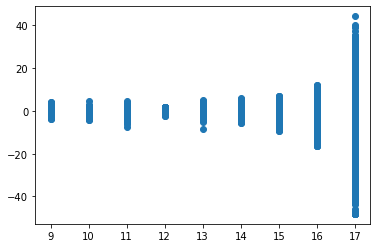

In [64]:
plt.scatter(all_df["Hour"],all_df["Horiz_acc"])

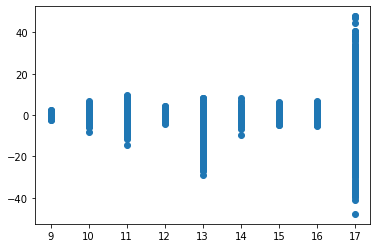

In [72]:
plt.scatter(all_df["Hour"],all_df["vert_accel"])

In [66]:
all_temp_list = glob.glob("Learning_set/Bearing1_1_temp/*.csv")

In [ ]:
["Hour","Minute","Second 0.x","second","Rtd sensor"]

In [68]:
pd.read_csv(all_temp_list[0],header=None)

,0,1,2,3,4
0,9,40,47,5,70.378
1,9,40,47,6,70.378
2,9,40,47,7,70.397
3,9,40,47,8,70.397
4,9,40,47,9,70.418
...,...,...,...,...,...
595,9,41,47,0,75.850
596,9,41,47,1,75.864
597,9,41,47,2,75.864
598,9,41,47,3,75.880


In [69]:
index = 1
all_temp_df = pd.DataFrame()
for i in all_temp_list:
    acc_one = pd.read_csv(i,header=None)
    acc_one["id"] = index
    acc_one.columns = ["Hour","Minute","Second 0.x","second","Rtd sensor","id"]
    index += 1
    all_temp_df = pd.concat([all_temp_df, acc_one],axis=0)

In [76]:
all_temp_df.columns = ["Hour","Minute","Second","0.x_Second","Rtd sensor","id"]

In [77]:
all_temp_df.max()

Hour           17.00
Minute         59.00
Second         59.00
0.x_Second      9.00
Rtd sensor    164.37
id            466.00
dtype: float64

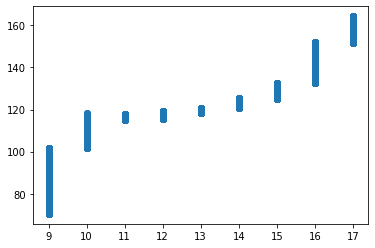

In [74]:
plt.scatter(all_temp_df["Hour"],all_temp_df["Rtd sensor"])

### all transfer to min unit

In [79]:
all_temp_df["sum_0.x_second"]  = all_temp_df["Hour"]*60*60*10 + all_temp_df["Minute"]*60*10 + all_temp_df["Second"]*10 + all_temp_df["0.x_Second"]

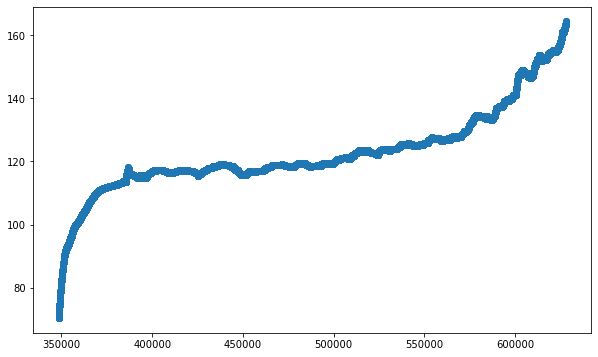

In [83]:
plt.figure(figsize=(10,6))
plt.scatter(all_temp_df["sum_0.x_second"], all_temp_df["Rtd sensor"])

### u-second 10**-6

In [87]:
all_temp_df.to_csv("1-1_temp_df.csv",index=None)

In [89]:
all_df.to_csv("1-1_acc_df.csv",index=None)

In [2]:
acc_df = pd.read_csv("1-1_acc_df.csv")

In [3]:
temp_df = pd.read_csv("1-1_temp_df.csv")

In [7]:
temp_df_m = temp_df[["Rtd sensor","sum_0.x_second"]]

In [8]:
temp_df_m 

,Rtd sensor,sum_0.x_second
0,70.378,348475
1,70.378,348476
2,70.397,348477
3,70.397,348478
4,70.418,348479
...,...,...
279512,164.340,627987
279513,164.340,627988
279514,164.360,627989
279515,164.360,627990


In [64]:
df

NameError: name 'df' is not defined

In [9]:
def p2ph_h(df):
    x=df
    peaks, _ = find_peaks(x)
    results_half = peak_widths(x, peaks, rel_height=0.5)
    if results_half[0].shape[0] == 0 :
        return 0
    else:
        return(np.max(results_half[0]))

def p2pf_f(df):
    x=df
    peaks, _ = find_peaks(x)
    results_full = peak_widths(x, peaks, rel_height=1)   
    if results_full[0].shape[0] == 0 :
        return 0
    else:
        return(np.max(results_full[0]))

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  RandomForestClassifier
from sklearn import metrics

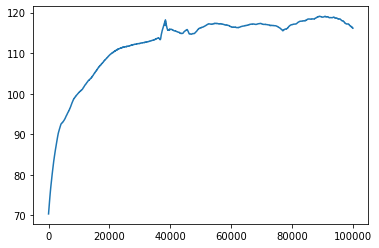

In [12]:
plt.plot(temp_df["Rtd sensor"][0:100000])

In [14]:
def add_features(df_in, ws):
    
        
    
    
    sensor_cols = ["Rtd sensor"]
    sensor_av_cols = ["av_temp"]
    sensor_sd_cols = ["sd_temp"]
    sensor_peak_cols = ["peak_temp"]
    sensor_rms_cols = ["rms_temp"]
    sensor_skew_cols = ["skew_temp"]
    sensor_kurt_cols = ["kurt_temp"]
    sensor_crest_cols = ["crest_temp"]
    sensor_clear_cols = ["clear_temp"]
    sensor_shape_cols = ["shape_temp"]
    sensor_imp_cols = ["imp_temp"]
#     sensor_p2ph_cols = [nm.replace('s', 'p2ph') for nm in sensor_cols]
#     sensor_p2pf_cols = [nm.replace('s', 'p2pf') for nm in sensor_cols]


    df_out = pd.DataFrame()
    for m_id in pd.unique(df_in.id):

            # get a subset for each engine sensors
            df_engine = df_in[df_in['id'] == m_id]
            df_sub = df_engine[sensor_cols]


            # get rolling mean for the subset
            av = df_sub.rolling(ws, min_periods=1).mean()
            av.columns = sensor_av_cols

            # get the rolling standard deviation for the subset
            sd = df_sub.rolling(ws, min_periods=1).std().fillna(0)
            sd.columns = sensor_sd_cols

            # get the rolling peak value for the subset
            pk = df_sub.rolling(ws, min_periods=1).max().fillna(0)
            pk.columns = sensor_peak_cols       

            # get the rolling rms for the subset
            rms = lambda d: np.sqrt ((d ** 2) .sum ()/d.size)
            res = df_sub.rolling(ws, min_periods=1).apply (rms).fillna(0)
            res.columns = sensor_rms_cols

            # get the rolling skewness for the subset
            skew = df_sub.rolling(ws, min_periods=1).skew().fillna(0)
            skew.columns = sensor_skew_cols

            # get the rolling skewness for the subset
            kurt = df_sub.rolling(ws, min_periods=1).apply(kurtosis).fillna(0)
            kurt.columns = sensor_kurt_cols

            # get the rolling crest i for the subset
            res_sub = res.copy()
            pk_sub = pk.copy()
            res_sub.columns = sensor_crest_cols
            pk_sub.columns = sensor_crest_cols
            crest = pk_sub/res_sub
            crest.columns = sensor_crest_cols    

            # get the rolling clearance i for the subset
            # get the sub
            sub_f = lambda d: np.square ((d ** 0.5) .sum ()/d.size)
            sub = df_sub.rolling(ws, min_periods=1).apply (sub_f).fillna(0)
            sub.columns = sensor_crest_cols
            clear = pk_sub/sub
            clear.columns = sensor_clear_cols

            # get the rolling shape i for the subset
            av_sub = av.copy()
            av_sub.columns = sensor_crest_cols
            shape = res_sub/av_sub
            shape.columns = sensor_shape_cols

            # get the rolling impulse i for the subset
            imp = pk_sub/av_sub
            imp.columns = sensor_imp_cols

#             # get rolling p2p_half length for the subset
#             p2ph = df_sub.rolling(ws, min_periods=1).apply(p2ph_h)
#             p2ph.columns = sensor_p2ph_cols

#             # get rolling p2p_full length for the subset
#             p2pf = df_sub.rolling(ws, min_periods=1).apply(p2pf_f)
#             p2pf.columns = sensor_p2pf_cols        
#             # combine the two new subset dataframes columns to the engine subset

            new_ftrs = pd.concat([df_engine,av,sd,pk,res,skew,kurt,crest,clear,shape,imp], axis=1)
        
            # add the new features rows to the output dataframe
            df_out = pd.concat([df_out,new_ftrs])
    
    return df_out

In [18]:
temp_df_m["id"] = 1

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
fe_temp = add_features(temp_df_m,600)

In [21]:
fe_temp.to_csv("fe_temp_1.csv",index=None)

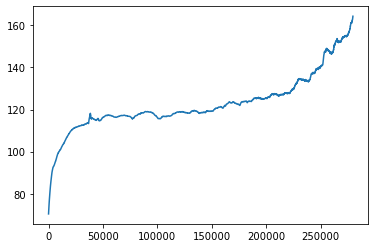

In [22]:
plt.plot(fe_temp["Rtd sensor"])

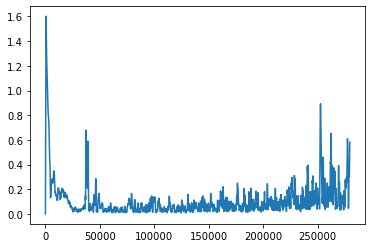

In [23]:
plt.plot(fe_temp["sd_temp"])

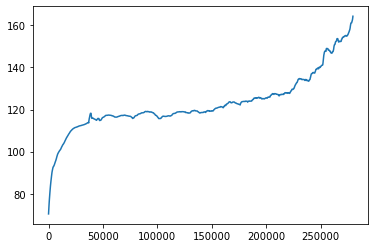

In [85]:
plt.plot(fe_temp["peak_temp"])

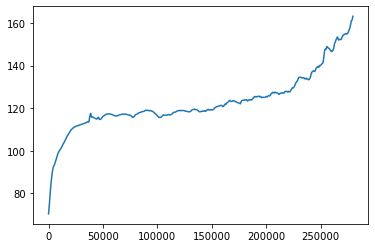

In [87]:
plt.plot(fe_temp["rms_temp"])

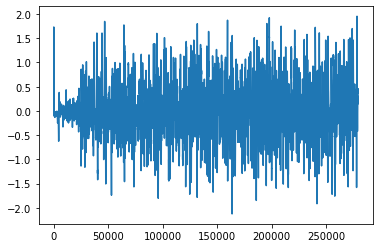

In [88]:
plt.plot(fe_temp["skew_temp"])

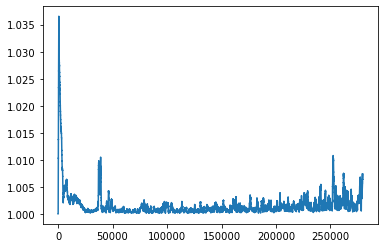

In [89]:
plt.plot(fe_temp["crest_temp"])

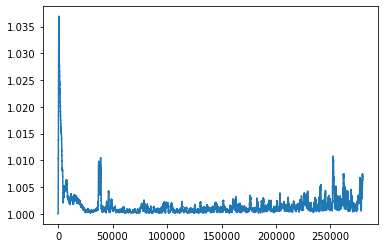

In [90]:
plt.plot(fe_temp["clear_temp"])

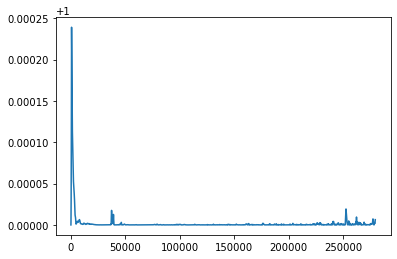

In [91]:
plt.plot(fe_temp["shape_temp"])

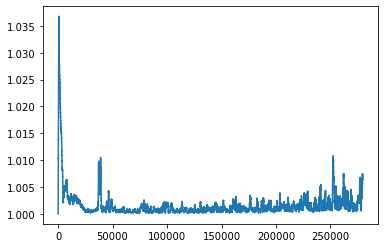

In [92]:
plt.plot(fe_temp["imp_temp"])

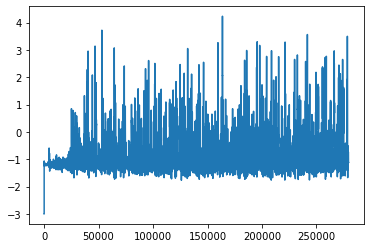

In [93]:
plt.plot(fe_temp["kurt_temp"])

In [24]:
fe_temp

,Rtd sensor,sum_0.x_second,id,av_temp,sd_temp,peak_temp,rms_temp,skew_temp,kurt_temp,crest_temp,clear_temp,shape_temp,imp_temp
0,70.378,348475,1,70.378000,0.000000,70.378,70.378000,0.000000,-3.000000,1.000000,1.000000,1.000000,1.000000
1,70.378,348476,1,70.378000,0.000000,70.378,70.378000,0.000000,-3.000000,1.000000,1.000000,1.000000,1.000000
2,70.397,348477,1,70.384333,0.010970,70.397,70.384334,1.731395,-1.500000,1.000180,1.000180,1.000000,1.000180
3,70.397,348478,1,70.387500,0.010970,70.397,70.387501,-0.000162,-2.000000,1.000135,1.000135,1.000000,1.000135
4,70.418,348479,1,70.393600,0.016622,70.418,70.393602,0.636223,-1.063112,1.000347,1.000347,1.000000,1.000347
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279512,164.340,627987,1,163.144683,0.578763,164.340,163.145708,0.376501,-1.127454,1.007320,1.007330,1.000006,1.007327
279513,164.340,627988,1,163.148000,0.579903,164.340,163.149029,0.376050,-1.126622,1.007300,1.007309,1.000006,1.007306
279514,164.360,627989,1,163.151333,0.581112,164.360,163.152367,0.375814,-1.124991,1.007402,1.007411,1.000006,1.007408
279515,164.360,627990,1,163.154667,0.582301,164.360,163.155704,0.375471,-1.123691,1.007381,1.007391,1.000006,1.007388


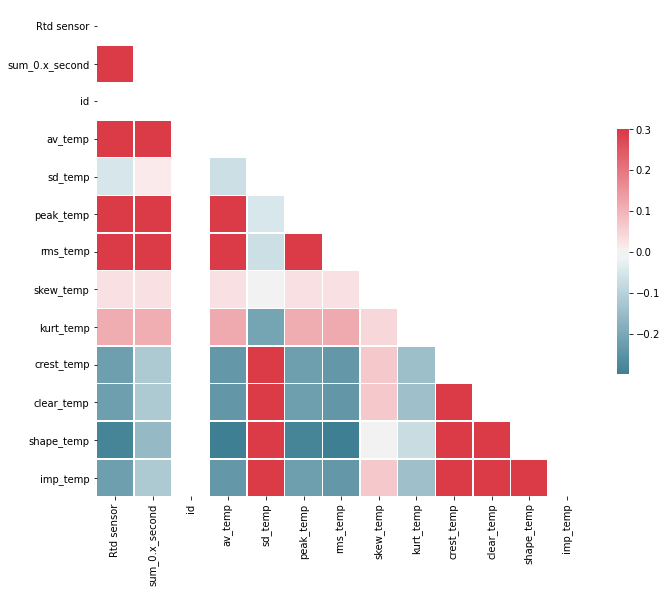

In [26]:
# 計算相關係數
corr = fe_temp.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
from sklearn.model_selection import train_test_split

In [53]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [29]:
fe_temp

,Rtd sensor,sum_0.x_second,id,av_temp,sd_temp,peak_temp,rms_temp,skew_temp,kurt_temp,crest_temp,clear_temp,shape_temp,imp_temp
0,70.378,348475,1,70.378000,0.000000,70.378,70.378000,0.000000,-3.000000,1.000000,1.000000,1.000000,1.000000
1,70.378,348476,1,70.378000,0.000000,70.378,70.378000,0.000000,-3.000000,1.000000,1.000000,1.000000,1.000000
2,70.397,348477,1,70.384333,0.010970,70.397,70.384334,1.731395,-1.500000,1.000180,1.000180,1.000000,1.000180
3,70.397,348478,1,70.387500,0.010970,70.397,70.387501,-0.000162,-2.000000,1.000135,1.000135,1.000000,1.000135
4,70.418,348479,1,70.393600,0.016622,70.418,70.393602,0.636223,-1.063112,1.000347,1.000347,1.000000,1.000347
...,...,...,...,...,...,...,...,...,...,...,...,...,...
279512,164.340,627987,1,163.144683,0.578763,164.340,163.145708,0.376501,-1.127454,1.007320,1.007330,1.000006,1.007327
279513,164.340,627988,1,163.148000,0.579903,164.340,163.149029,0.376050,-1.126622,1.007300,1.007309,1.000006,1.007306
279514,164.360,627989,1,163.151333,0.581112,164.360,163.152367,0.375814,-1.124991,1.007402,1.007411,1.000006,1.007408
279515,164.360,627990,1,163.154667,0.582301,164.360,163.155704,0.375471,-1.123691,1.007381,1.007391,1.000006,1.007388


In [57]:
X = fe_temp.drop(["sum_0.x_second","id"], axis=1)
y = fe_temp["sum_0.x_second"]

In [61]:
X

,Rtd sensor,av_temp,sd_temp,peak_temp,rms_temp,skew_temp,kurt_temp,crest_temp,clear_temp,shape_temp,imp_temp
0,70.378,70.378000,0.000000,70.378,70.378000,0.000000,-3.000000,1.000000,1.000000,1.000000,1.000000
1,70.378,70.378000,0.000000,70.378,70.378000,0.000000,-3.000000,1.000000,1.000000,1.000000,1.000000
2,70.397,70.384333,0.010970,70.397,70.384334,1.731395,-1.500000,1.000180,1.000180,1.000000,1.000180
3,70.397,70.387500,0.010970,70.397,70.387501,-0.000162,-2.000000,1.000135,1.000135,1.000000,1.000135
4,70.418,70.393600,0.016622,70.418,70.393602,0.636223,-1.063112,1.000347,1.000347,1.000000,1.000347
...,...,...,...,...,...,...,...,...,...,...,...
279512,164.340,163.144683,0.578763,164.340,163.145708,0.376501,-1.127454,1.007320,1.007330,1.000006,1.007327
279513,164.340,163.148000,0.579903,164.340,163.149029,0.376050,-1.126622,1.007300,1.007309,1.000006,1.007306
279514,164.360,163.151333,0.581112,164.360,163.152367,0.375814,-1.124991,1.007402,1.007411,1.000006,1.007408
279515,164.360,163.154667,0.582301,164.360,163.155704,0.375471,-1.123691,1.007381,1.007391,1.000006,1.007388


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
rf = RandomForestRegressor(n_estimators=368, max_features=9, max_depth=9, n_jobs=-1, random_state=1)

rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)


train_r2 = r2_score(y_train, y_train_predict)
test_r2 = r2_score(y_test, y_test_predict)
train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
train_mape = mean_absolute_percentage_error(y_train, y_train_predict)
test_mape = mean_absolute_percentage_error(y_test, y_test_predict)
print('R2 training: %.3f, R2 testing: %.3f' % (
      (train_r2), (test_r2)))
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mape), (test_mape)))

R2 training: 0.988, R2 testing: 0.988
MSE training: 79167064.568, MSE testing: 79416904.895
RMSE training: 8897.588, RMSE testing: 8911.616
RMSE training: 0.995, RMSE testing: 0.999


In [47]:
X = pd.DataFrame(fe_temp["Rtd sensor"])
y = fe_temp["sum_0.x_second"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
rf = DecisionTreeRegressor(max_depth=10)

rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

train_r2 = r2_score(y_train, y_train_predict)
test_r2 = r2_score(y_test, y_test_predict)
train_mse = mean_squared_error(y_train, y_train_predict)
test_mse = mean_squared_error(y_test, y_test_predict)
train_mape = mean_absolute_percentage_error(y_train, y_train_predict)
test_mape = mean_absolute_percentage_error(y_test, y_test_predict)
print('R2 training: %.3f, R2 testing: %.3f' % (
      (train_r2), (test_r2)))
print('MSE training: %.3f, MSE testing: %.3f' % (
      (train_mse), (test_mse)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mse**0.5), (test_mse**0.5)))
print('RMSE training: %.3f, RMSE testing: %.3f' % (
      (train_mape), (test_mape)))

R2 training: 0.980, R2 testing: 0.980
MSE training: 129763301.367, MSE testing: 130225101.578
RMSE training: 11391.370, RMSE testing: 11411.621
RMSE training: 1.426, RMSE testing: 1.429


In [36]:
from sklearn.metrics import r2_score

In [34]:
from sklearn.metrics import mean_squared_error

In [ ]:
rd = RandomForestRegressor()

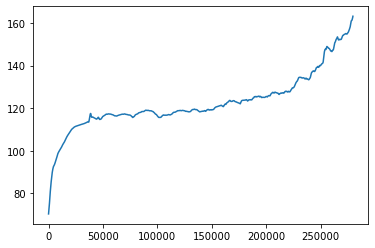

In [94]:
plt.plot(fe_temp["av_temp"])

In [95]:
def add_features_acc(df_in, ws):
    
        
    
    
    sensor_cols = ["Rtd sensor"]
    sensor_av_cols = ["av_temp"]
    sensor_sd_cols = ["sd_temp"]
    sensor_peak_cols = ["peak_temp"]
    sensor_rms_cols = ["rms_temp"]
    sensor_skew_cols = ["skew_temp"]
    sensor_kurt_cols = ["kurt_temp"]
    sensor_crest_cols = ["crest_temp"]
    sensor_clear_cols = ["clear_temp"]
    sensor_shape_cols = ["shape_temp"]
    sensor_imp_cols = ["imp_temp"]
#     sensor_p2ph_cols = [nm.replace('s', 'p2ph') for nm in sensor_cols]
#     sensor_p2pf_cols = [nm.replace('s', 'p2pf') for nm in sensor_cols]


    df_out = pd.DataFrame()
    for m_id in pd.unique(df_in.id):

            # get a subset for each engine sensors
            df_engine = df_in[df_in['id'] == m_id]
            df_sub = df_engine[sensor_cols]


            # get rolling mean for the subset
            av = df_sub.rolling(ws, min_periods=1).mean()
            av.columns = sensor_av_cols

            # get the rolling standard deviation for the subset
            sd = df_sub.rolling(ws, min_periods=1).std().fillna(0)
            sd.columns = sensor_sd_cols

            # get the rolling peak value for the subset
            pk = df_sub.rolling(ws, min_periods=1).max().fillna(0)
            pk.columns = sensor_peak_cols       

            # get the rolling rms for the subset
            rms = lambda d: np.sqrt ((d ** 2) .sum ()/d.size)
            res = df_sub.rolling(ws, min_periods=1).apply (rms).fillna(0)
            res.columns = sensor_rms_cols

            # get the rolling skewness for the subset
            skew = df_sub.rolling(ws, min_periods=1).skew().fillna(0)
            skew.columns = sensor_skew_cols

            # get the rolling skewness for the subset
            kurt = df_sub.rolling(ws, min_periods=1).apply(kurtosis).fillna(0)
            kurt.columns = sensor_kurt_cols

            # get the rolling crest i for the subset
            res_sub = res.copy()
            pk_sub = pk.copy()
            res_sub.columns = sensor_crest_cols
            pk_sub.columns = sensor_crest_cols
            crest = pk_sub/res_sub
            crest.columns = sensor_crest_cols    

            # get the rolling clearance i for the subset
            # get the sub
            sub_f = lambda d: np.square ((d ** 0.5) .sum ()/d.size)
            sub = df_sub.rolling(ws, min_periods=1).apply (sub_f).fillna(0)
            sub.columns = sensor_crest_cols
            clear = pk_sub/sub
            clear.columns = sensor_clear_cols

            # get the rolling shape i for the subset
            av_sub = av.copy()
            av_sub.columns = sensor_crest_cols
            shape = res_sub/av_sub
            shape.columns = sensor_shape_cols

            # get the rolling impulse i for the subset
            imp = pk_sub/av_sub
            imp.columns = sensor_imp_cols

#             # get rolling p2p_half length for the subset
#             p2ph = df_sub.rolling(ws, min_periods=1).apply(p2ph_h)
#             p2ph.columns = sensor_p2ph_cols

#             # get rolling p2p_full length for the subset
#             p2pf = df_sub.rolling(ws, min_periods=1).apply(p2pf_f)
#             p2pf.columns = sensor_p2pf_cols        
#             # combine the two new subset dataframes columns to the engine subset

            new_ftrs = pd.concat([df_engine,av,sd,pk,res,skew,kurt,crest,clear,shape,imp], axis=1)
        
            # add the new features rows to the output dataframe
            df_out = pd.concat([df_out,new_ftrs])
    
    return df_out

In [97]:
acc_df_m = acc_df[["Horiz_acc","vert_accel","sum_us"]]

In [98]:
acc_df_m["id"] = 1

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
def add_features_acc(df_in, ws):
    
        
    
    
    sensor_cols = ["Horiz_acc","vert_accel"]
    sensor_av_cols = ["av_horiz","av_vert"]
    sensor_sd_cols = ["sd_horiz","sd_vert"]
    sensor_peak_cols = ["peak_horiz","peak_vert"]
    sensor_rms_cols = ["rms_horiz","rms_vert"]
    sensor_skew_cols =["skew_horiz","skew_vert"]
    sensor_kurt_cols = ["kurt_horiz","kurt_vert"]
    
    sensor_crest_cols = ["crest_horiz","crest_vert"]
    sensor_clear_cols = ["clear_horiz","clear_vert"]
    sensor_shape_cols =["shape_horiz","shape_vert"]
    sensor_imp_cols = ["imp_horiz","imp_vert"]
    sensor_p2ph_cols = ["p2ph_horiz","p2ph_vert"]
    sensor_p2pf_cols = ["p2pf_horiz","p2pf_vert"]


    df_out = pd.DataFrame()
    for m_id in pd.unique(df_in.id):

            # get a subset for each engine sensors
            df_engine = df_in[df_in['id'] == m_id]
            df_sub = df_engine[sensor_cols]


            # get rolling mean for the subset
            av = df_sub.rolling(ws, min_periods=1).mean()
            av.columns = sensor_av_cols

            # get the rolling standard deviation for the subset
            sd = df_sub.rolling(ws, min_periods=1).std().fillna(0)
            sd.columns = sensor_sd_cols

            # get the rolling peak value for the subset
            pk = df_sub.rolling(ws, min_periods=1).max().fillna(0)
            pk.columns = sensor_peak_cols       

            # get the rolling rms for the subset
            rms = lambda d: np.sqrt ((d ** 2) .sum ()/d.size)
            res = df_sub.rolling(ws, min_periods=1).apply (rms).fillna(0)
            res.columns = sensor_rms_cols

            # get the rolling skewness for the subset
            skew = df_sub.rolling(ws, min_periods=1).skew().fillna(0)
            skew.columns = sensor_skew_cols

            # get the rolling skewness for the subset
            kurt = df_sub.rolling(ws, min_periods=1).apply(kurtosis).fillna(0)
            kurt.columns = sensor_kurt_cols

            # get the rolling crest i for the subset
            res_sub = res.copy()
            pk_sub = pk.copy()
            res_sub.columns = sensor_crest_cols
            pk_sub.columns = sensor_crest_cols
            crest = pk_sub/res_sub
            crest.columns = sensor_crest_cols    

            # get the rolling clearance i for the subset
            # get the sub
            sub_f = lambda d: np.square ((d ** 0.5) .sum ()/d.size)
            sub = df_sub.rolling(ws, min_periods=1).apply (sub_f).fillna(0)
            sub.columns = sensor_crest_cols
            clear = pk_sub/sub
            clear.columns = sensor_clear_cols

            # get the rolling shape i for the subset
            av_sub = av.copy()
            av_sub.columns = sensor_crest_cols
            shape = res_sub/av_sub
            shape.columns = sensor_shape_cols

            # get the rolling impulse i for the subset
            imp = pk_sub/av_sub
            imp.columns = sensor_imp_cols

            # get rolling p2p_half length for the subset
            p2ph = df_sub.rolling(ws, min_periods=1).apply(p2ph_h)
            p2ph.columns = sensor_p2ph_cols

#             # get rolling p2p_full length for the subset
            p2pf = df_sub.rolling(ws, min_periods=1).apply(p2pf_f)
            p2pf.columns = sensor_p2pf_cols        
#             # combine the two new subset dataframes columns to the engine subset

            new_ftrs = pd.concat([df_engine,av,sd,pk,res,skew,kurt,crest,clear,shape,imp,p2ph,p2pf], axis=1)
        
            # add the new features rows to the output dataframe
            df_out = pd.concat([df_out,new_ftrs])
    
    return df_out

In [ ]:
fe_acc = add_features_acc(acc_df_m,2560)

In [ ]:
1 sample => plt.plot(fe_temp["av_temp"])

In [17]:
all_df[all_df["id"]==1]

NameError: name 'all_df' is not defined

In [6]:
all_df["sum_us"] = all_df["Hour"]*60*60*10**6 + all_df["Minute"]*60*10**6 + all_df["second"]*10**6 + all_df["u-Second"]

In [7]:
all_df

,Hour,Minute,second,u-Second,Horiz_acc,vert_accel,id,sum_us
0,9,39,39,65664.0,0.552,-0.146,1,3.477907e+10
1,9,39,39,65703.0,0.501,-0.480,1,3.477907e+10
2,9,39,39,65742.0,0.138,0.435,1,3.477907e+10
3,9,39,39,65781.0,-0.423,0.240,1,3.477907e+10
4,9,39,39,65820.0,-0.802,0.020,1,3.477907e+10
...,...,...,...,...,...,...,...,...
7175675,17,26,39,165470.0,-3.353,2.129,2803,6.279917e+10
7175676,17,26,39,165510.0,-2.868,-2.299,2803,6.279917e+10
7175677,17,26,39,165550.0,-5.507,-1.844,2803,6.279917e+10
7175678,17,26,39,165580.0,-3.578,2.146,2803,6.279917e+10


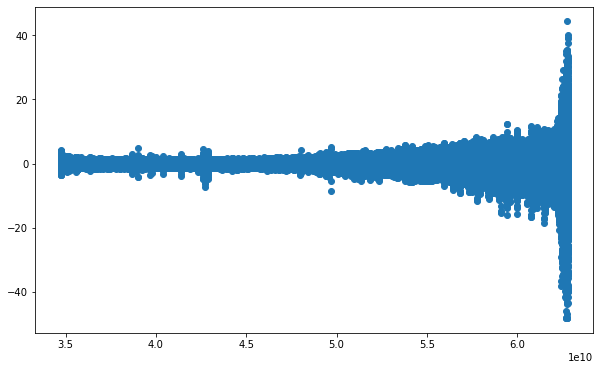

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(all_df["sum_us"], all_df["Horiz_acc"])

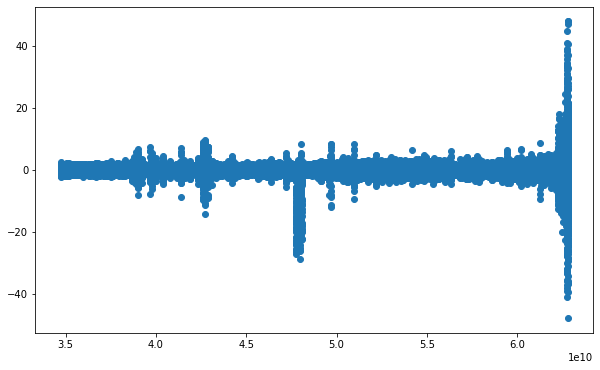

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(all_df["sum_us"], all_df["vert_accel"])

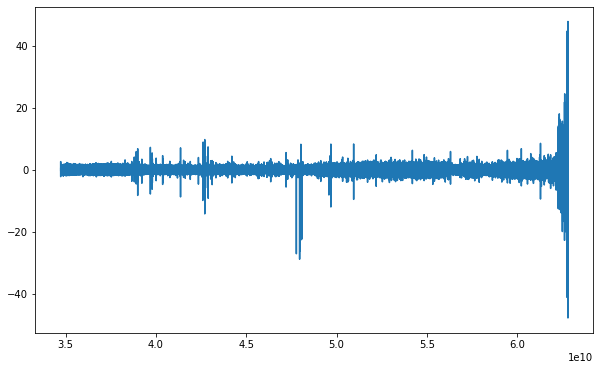

In [19]:
plt.figure(figsize=(10,6))
plt.plot(all_df["sum_us"], all_df["vert_accel"])

In [14]:
all_df.to_csv("1-1_acc_df.csv",index=None)

In [16]:
all_df

,Hour,Minute,second,u-Second,Horiz_acc,vert_accel,id,sum_us
0,9,39,39,65664.0,0.552,-0.146,1,3.477907e+10
1,9,39,39,65703.0,0.501,-0.480,1,3.477907e+10
2,9,39,39,65742.0,0.138,0.435,1,3.477907e+10
3,9,39,39,65781.0,-0.423,0.240,1,3.477907e+10
4,9,39,39,65820.0,-0.802,0.020,1,3.477907e+10
...,...,...,...,...,...,...,...,...
7175675,17,26,39,165470.0,-3.353,2.129,2803,6.279917e+10
7175676,17,26,39,165510.0,-2.868,-2.299,2803,6.279917e+10
7175677,17,26,39,165550.0,-5.507,-1.844,2803,6.279917e+10
7175678,17,26,39,165580.0,-3.578,2.146,2803,6.279917e+10


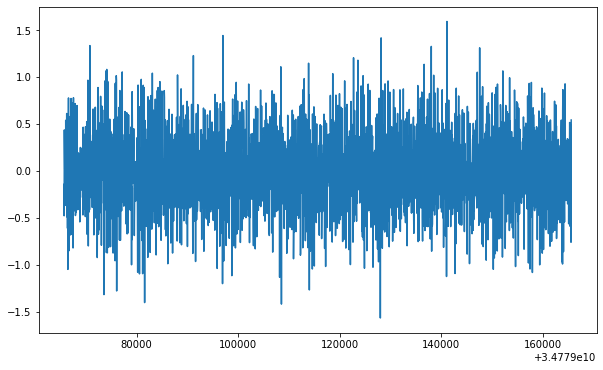

In [18]:
plt.figure(figsize=(10,6))
plt.plot(all_df["sum_us"][0:2560], all_df["vert_accel"][0:2560])

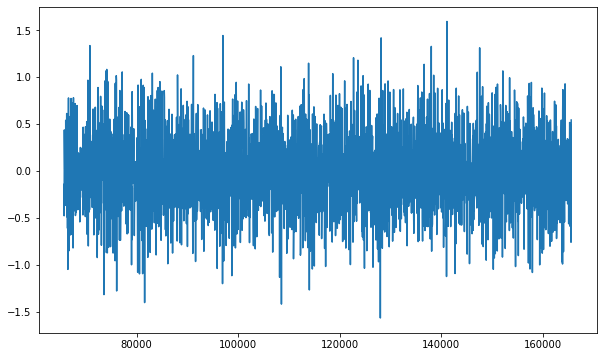

In [24]:
plt.figure(figsize=(10,6))
plt.plot(all_df["u-Second"][0:2560], all_df["vert_accel"][0:2560])